<a href="https://colab.research.google.com/github/KeerthikaReddy02/Phobia-Detector/blob/main/Phobia_detector(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phobia detector

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import cv2
import math
import matplotlib.pyplot as plt

## Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Human vs Horses/horse-or-human/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1027 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Human vs Horses/horse-or-human/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 256 images belonging to 2 classes.


## Building the CNN

In [ ]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Training the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
33/33 [==============================] - 8s 233ms/step - loss: 0.6982 - accuracy: 0.5346 - val_loss: 0.6857 - val_accuracy: 0.7930
Epoch 2/25
33/33 [==============================] - 8s 235ms/step - loss: 0.6104 - accuracy: 0.6388 - val_loss: 0.8280 - val_accuracy: 0.7891
Epoch 3/25
33/33 [==============================] - 8s 248ms/step - loss: 0.3567 - accuracy: 0.8491 - val_loss: 1.0127 - val_accuracy: 0.8125
Epoch 4/25
33/33 [==============================] - 9s 264ms/step - loss: 0.2741 - accuracy: 0.8861 - val_loss: 0.7727 - val_accuracy: 0.8555
Epoch 5/25
33/33 [==============================] - 10s 301ms/step - loss: 0.2028 - accuracy: 0.9231 - val_loss: 0.8756 - val_accuracy: 0.8359
Epoch 6/25
33/33 [==============================] - 9s 281ms/step - loss: 0.1672 - accuracy: 0.9367 - val_loss: 1.0698 - val_accuracy: 0.8281
Epoch 7/25
33/33 [==============================] - 10s 291ms/step - loss: 0.1244 - accuracy: 0.9552 - val_loss: 1.0007 - val_accuracy: 0.8516
Epoc

## Saving the CNN

In [ ]:
cnn.save("horse-human.h5")
print("Done!")

Done!


## Prediction

### Converting video into frame of images

In [34]:
count = 0
videoFile = "Dog.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Phobia_%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


### Printing a frame

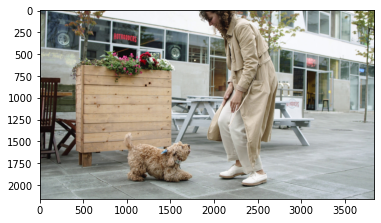

In [35]:
img = plt.imread('Phobia_2.jpg') 
plt.imshow(img)

### User chooses which phobia

In [36]:
print("What phobia would you like to check for?")
print("\n1.Allurophobia(Fear of Cats)\n2.Cynophoia(Fear of Dogs)\n3.Hippophobia(Fear of Horses)")
value=input()


What phobia would you like to check for?

1.Allurophobia(Fear of Cats)
2.Cynophoia(Fear of Dogs)
3.Hippophobia(Fear of Horses)
2


###Loading the model

In [37]:
from keras.models import load_model
if value=="1" or value=="2":
  cnn=load_model('dogcat.h5')
  print("Done\n")
if value=="3":
  cnn=load_model('horse-human.h5')
  print("Done\n")

Done



### Final prediction output

In [38]:
count_1=0
count_2=0
for i in range(0,count):
  frame="Phobia_"+str(i)+".jpg"
  test_image = image.load_img(frame, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  if result[0][0] == 1:
    count_1+=1
  else:
    count_2+=1   
if(value=="2" and count_1>0):
  print("Cynophoia(Fear of Dogs)")
elif(value=="1" and count_2>0):
  print("Allurophobia(Fear of Cats)")  
elif(value=="3" and count_1>0):
  print("Hippophobia(Fear of Horses)")   
else:
  print("Your phobia is not present")    

 

Cynophoia(Fear of Dogs)
